# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [19]:
# Load the dataset
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [20]:
# Display basic info
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [22]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [23]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [24]:
# Select only numeric columns for visualization
numeric_df = df.select_dtypes(include=['number'])

In [31]:
# Print column names to identify the target variable
print("Column Names in Dataset:", df.columns)

Column Names in Dataset: Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')


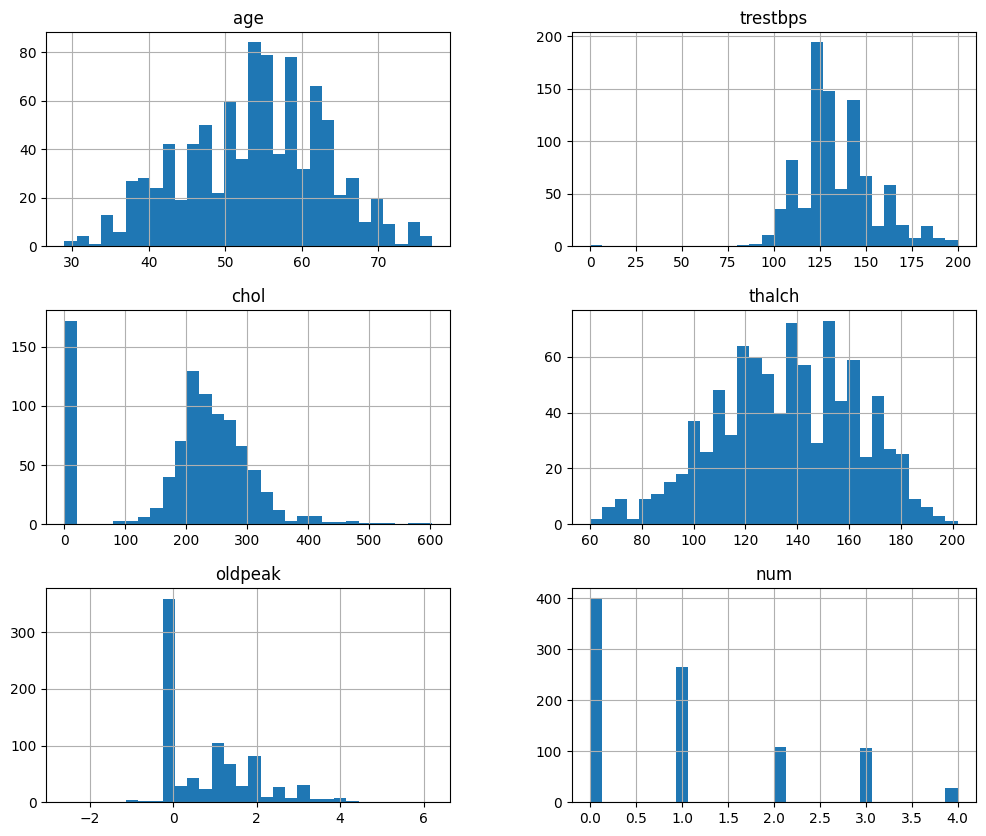

In [25]:
# Check if numeric columns exist before plotting
if not numeric_df.empty:
    numeric_df.hist(bins=30, figsize=(12, 10))
    plt.show()
else:
    print("No numeric columns available for histogram plotting.")

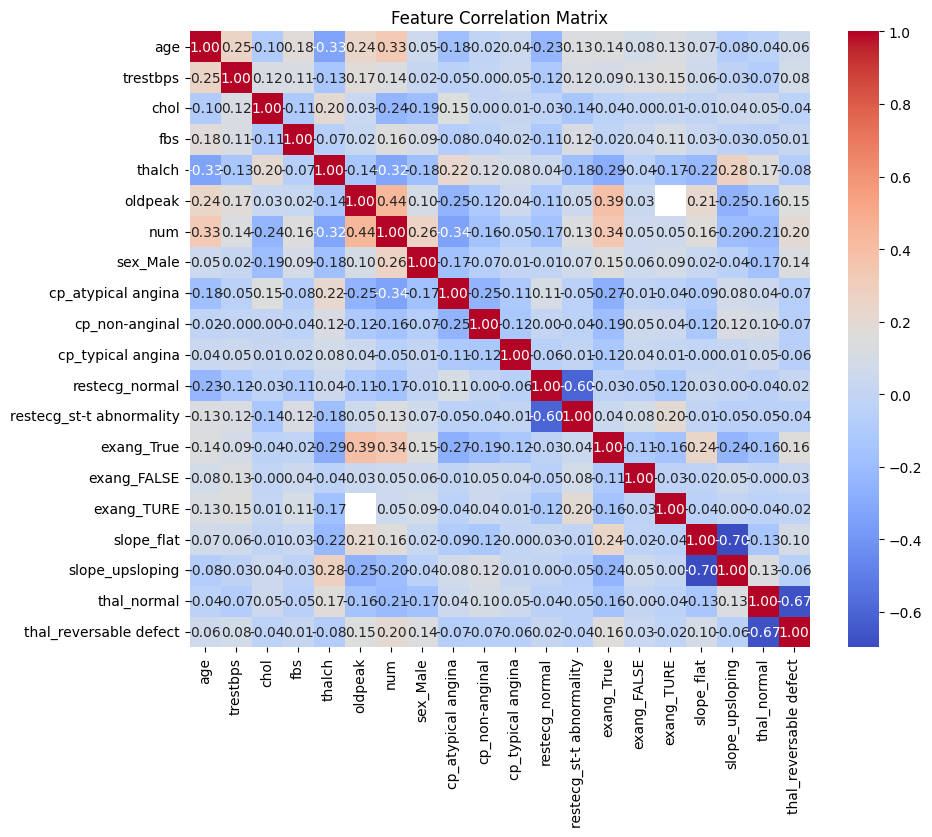

In [27]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [33]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot encoding

In [34]:
# Define the correct target variable (assuming last column is the target)
target_column = df.columns[-1]  # Change this if needed

In [35]:
# Feature-target split
X = df.drop(columns=[target_column])
y = df[target_column]

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Model training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Predictions
y_pred = dt.predict(X_test)

In [39]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7417582417582418
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.85      0.82       123
        True       0.62      0.53      0.57        59

    accuracy                           0.74       182
   macro avg       0.70      0.69      0.69       182
weighted avg       0.73      0.74      0.74       182

Confusion Matrix:
 [[104  19]
 [ 28  31]]
ROC-AUC Score: 0.685476092049056


In [40]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
gscv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [41]:
# Best model
best_model = gscv.best_estimator_
print("Best Parameters:", gscv.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


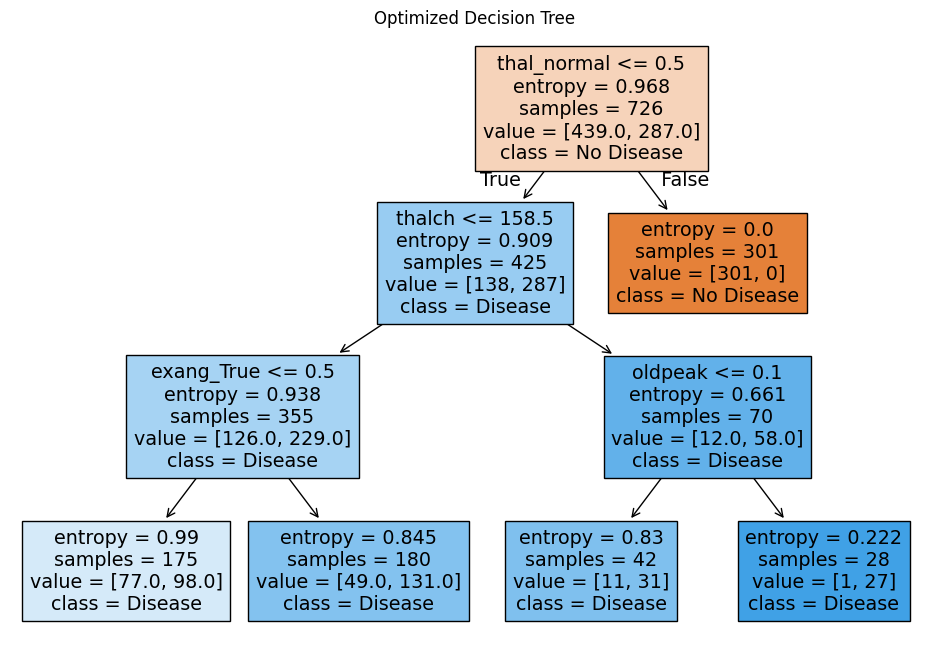

In [42]:
# Decision tree visualization
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Optimized Decision Tree")
plt.show()

# Interview Questions & Answers

In [43]:
# Q1: Common Hyperparameters of Decision Tree Models & Their Effects
print("1. Common Hyperparameters of Decision Tree Models & Their Effects:")
print("- max_depth: Controls the depth of the tree; deeper trees capture more complexity but may overfit.")
print("- min_samples_split: Minimum samples needed to split a node; higher values prevent overfitting.")
print("- criterion (gini/entropy): Determines how nodes are split; gini is faster, while entropy is more informative.\n")

1. Common Hyperparameters of Decision Tree Models & Their Effects:
- max_depth: Controls the depth of the tree; deeper trees capture more complexity but may overfit.
- min_samples_split: Minimum samples needed to split a node; higher values prevent overfitting.
- criterion (gini/entropy): Determines how nodes are split; gini is faster, while entropy is more informative.



In [44]:
# Q2: Difference Between Label Encoding & One-Hot Encoding
print("2. Difference Between Label Encoding & One-Hot Encoding:")
print("- Label Encoding: Assigns unique numerical values to categories (e.g., 'Red' → 0, 'Blue' → 1). Can introduce unintended ordinal relationships.")
print("- One-Hot Encoding: Creates separate binary columns for each category (e.g., Red = [1,0,0], Blue = [0,1,0]), preventing ordinal misinterpretation.")
print("- Use Case: Label encoding is suitable for ordinal data, while one-hot encoding is better for nominal categorical variables.\n")

2. Difference Between Label Encoding & One-Hot Encoding:
- Label Encoding: Assigns unique numerical values to categories (e.g., 'Red' → 0, 'Blue' → 1). Can introduce unintended ordinal relationships.
- One-Hot Encoding: Creates separate binary columns for each category (e.g., Red = [1,0,0], Blue = [0,1,0]), preventing ordinal misinterpretation.
- Use Case: Label encoding is suitable for ordinal data, while one-hot encoding is better for nominal categorical variables.

